<a href="https://colab.research.google.com/github/danielburch/danielburch.github.io/blob/master/assets/ipynb/GoldenState_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Housekeeping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.figure_factory as ff
import seaborn as sns
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



**Needed for Choropeth Graphs**

In [2]:
pip install plotly-geo

***Warning - In order to run the Choropleth Maps at the bottom, you may need to restart the notebook after installing plotly-geo***

In [3]:
pip install geopandas==0.3.0

In [4]:
pip install pyshp==1.2.10

**Import Datasets**



In [5]:
# From zillow.com/research/data/
#Pull data from Zillow (ZHVI Single-Family Home Time Series by ZipCode). Saved to my dropbox because of size of file
!wget https://www.dropbox.com/s/uib2ni87kv8kbrs/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon%20%281%29.csv?dl=0

--2020-06-26 04:33:03--  https://www.dropbox.com/s/uib2ni87kv8kbrs/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon%20%281%29.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uib2ni87kv8kbrs/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon%20%281%29.csv [following]
--2020-06-26 04:33:03--  https://www.dropbox.com/s/raw/uib2ni87kv8kbrs/Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon%20%281%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc70b1132ea006ce500ce22c8a30.dl.dropboxusercontent.com/cd/0/inline/A6UdqfQj2MpWIV8qm-aLQqqOEcrXQyslPQOT13UlaZe5D3bu5aqu0sF_Q_j8L__rAEfRCEqEo02vwexcrw7qNcO4g98X0TijciThMQ1M4WOlmOujMw0MeOGXU2HvWfB9UOU/file# [following]
--2020-06-26 04:33:04--  https://uc70b1132ea006ce500ce22c8a30.dl.dropboxusercontent

In [6]:
df_zip = pd.read_csv('Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon (1).csv?dl=0')
df_zip.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1510164.0,1512715.0,1513060.0,1516350.0,1511570.0,1517240.0,1518248.0,1529000.0,1520593.0,1512513.0,1493796.0,1483631.0,1479437.0,1472077.0,1465035.0,1456632.0,1448911.0,1443173.0,1435292.0,1433874.0,1438687.0,1439634.0,1439341.0,1425156.0,1411683.0,1400313.0,1398612.0,1399305.0,1400403.0,1393846.0,1390855.0,1378970.0,1370141.0,1363848.0,1362041.0,1367570.0,1370326.0,1372005.0,1366842.0,1359953.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,365256.0,364525.0,363967.0,363325.0,362021.0,361702.0,361022.0,362165.0,363923.0,366958.0,370446.0,373213.0,377182.0,380500.0,384464.0,386047.0,389450.0,389747.0,390571.0,388474.0,386114.0,382068.0,378225.0,376868.0,375288.0,375468.0,375386.0,378443.0,381168.0,386990.0,393192.0,...,952315.0,956010.0,958877.0,960829.0,959837.0,958118.0,959588.0,962361.0,962027.0,959077.0,959452.0,965001.0,970411.0,969566.0,969334.0,970476.0,974030.0,974215.0,973679.0,973928.0,976332.0,979826.0,982475.0,980651.0,977624.0,976025.0,975947.0,976500.0,975738.0,976843.0,977027.0,976584.0,975574.0,974382.0,973058.0,972991.0,974359.0,975996.0,976410.0,975820.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1708047.0,1690267.0,1680200.0,1678879.0,1676735.0,1680227.0,1684672.0,1688831.0,1677674.0,1665230.0,1649005.0,1639090.0,1640460.0,1645883.0,1652266.0,1654464.0,1657887.0,1663941.0,1665655.0,1663422.0,1662561.0,1660578.0,1657744.0,1643936.0,1629741.0,1618888.0,1611351.0,1604796.0,1591994.0,1577979.0,1564967.0,1555002.0,1548764.0,1543196.0,1539493.0,1542461.0,1543203.0,1539136.0,1531483.0,1524149.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,200810.0,201058.0,200861.0,199670.0,198531.0,197864.0,198629.0,198316.0,197662.0,196871.0,197774.0,199461.0,202023.0,203269.0,204548.0,206757.0,209219.0,210933.0,210601.0,212749.0,215262.0,217471.0,216537.0,214825.0,212089.0,210476.0,208768.0,207827.0,206787.0,206377.0,206269.0,...,332055.0,332848.0,332919.0,331855.0,331536.0,331782.0,331883.0,331693.0,331709.0,331764.0,332725.0,333731.0,334061.0,333859.0,334248.0,335196.0,335885.0,335738.0,336015.0,336310.0,336687.0,337111.0,336968.0,337390.0,337465.0,337581.0,336778.0,336180.0,335957.0,336404.0,336456.0,336602.0,336636.0,336627.0,336742.0,336507.0,336759.0,337294.0,338456.0,339493.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,547615.0,547182.0,546401.0,546341.0,544011.0,544029.0,543324.0,546204.0,549097.0,553623.0,558763.0,563217.0,567432.0,570651.0,574407.0,576404.0,582580.0,585334.0,588777.0,586977.0,584948.0,582007.0,579247.0,579361.0,581722.0,586546.0,592689.0,598996.0,605812.0,612767.0,621671.0,...,1176567.0,1184399.0,1190036.0,1194588.0,1195298.0,1193667.0,1194948.0,1199290.0,1201697.0,1201671.0,1204762.0,1211179.0,1215445.0,121

In [7]:
# From kaggle.com
#Zipcode to FIPS file for Choropleth
!wget https://www.dropbox.com/s/r5mzwxqjq4ee5ud/ZIP-COUNTY-FIPS_2017-06.csv?dl=0

--2020-06-26 04:33:09--  https://www.dropbox.com/s/r5mzwxqjq4ee5ud/ZIP-COUNTY-FIPS_2017-06.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/r5mzwxqjq4ee5ud/ZIP-COUNTY-FIPS_2017-06.csv [following]
--2020-06-26 04:33:09--  https://www.dropbox.com/s/raw/r5mzwxqjq4ee5ud/ZIP-COUNTY-FIPS_2017-06.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc22ec4e07b1947a6304da1e545c.dl.dropboxusercontent.com/cd/0/inline/A6XBzv3779BAiAzVwJdUrywenGNZ1MqfRRtRRjHm45B1m8cYL3YpyopUT5DoQFfYqVSLVW26KA_Ht4Z2neFv_ZadRblV823GFbsNj5Sr_3DSFLTb5CTagDrq0nQLF0bqLOs/file# [following]
--2020-06-26 04:33:09--  https://uc22ec4e07b1947a6304da1e545c.dl.dropboxusercontent.com/cd/0/inline/A6XBzv3779BAiAzVwJdUrywenGNZ1MqfRRtRRjHm45B1m8cYL3YpyopUT5DoQFfY

In [8]:
df_fips = pd.read_csv('/content/ZIP-COUNTY-FIPS_2017-06.csv?dl=0')
df_fips.head()

,ZIP,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
0,36003,Autauga County,AL,1001,H1
1,36006,Autauga County,AL,1001,H1
2,36067,Autauga County,AL,1001,H1
3,36066,Autauga County,AL,1001,H1
4,36703,Autauga County,AL,1001,H1


In [9]:
#From zillow.com/research/data/
#Pull data from Zillow (ZHVI Single-Family Home Time Series by Neighborhood). Saved to my dropbox because of size of file
!wget https://www.dropbox.com/s/m7o0in2jwh165ai/Neighborhood_zhvi_uc_sfr_sm_sa_mon.csv?dl=0

--2020-06-26 04:33:11--  https://www.dropbox.com/s/m7o0in2jwh165ai/Neighborhood_zhvi_uc_sfr_sm_sa_mon.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/m7o0in2jwh165ai/Neighborhood_zhvi_uc_sfr_sm_sa_mon.csv [following]
--2020-06-26 04:33:11--  https://www.dropbox.com/s/raw/m7o0in2jwh165ai/Neighborhood_zhvi_uc_sfr_sm_sa_mon.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf31e20ba2cf78628e6fd93fc40.dl.dropboxusercontent.com/cd/0/inline/A6Xglu0XKv6cSq1cuCwd75tzo5SqC5jU2uBeGvORb-l4ERzFGb7kfiey7b2xjl6eP20XPrQ6GH3LihQyzk_mBhmWeWHF2MME5JT2Qam5kuPbkAggSkH4J6OJH784nMoZaMQ/file# [following]
--2020-06-26 04:33:12--  https://ucf31e20ba2cf78628e6fd93fc40.dl.dropboxusercontent.com/cd/0/inline/A6Xglu0XKv6cSq1cuCwd75tzo5SqC5j

In [10]:
df_neigh = pd.read_csv('/content/Neighborhood_zhvi_uc_sfr_sm_sa_mon.csv?dl=0')

df_neigh.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,274772,0,Northeast Dallas,Neighborhood,TX,TX,Dallas,Dallas-Fort Worth-Arlington,Dallas County,158226.0,158611.0,159837.0,161033.0,162031.0,161930.0,161413.0,161133.0,160991.0,161691.0,161700.0,161751.0,162018.0,162528.0,161542.0,160544.0,159568.0,160159.0,160906.0,161621.0,161524.0,160748.0,160638.0,160857.0,159857.0,158400.0,157336.0,157508.0,157997.0,158074.0,158632.0,...,318681.0,320535.0,322561.0,324332.0,325407.0,325917.0,325653.0,326650.0,328179.0,330400.0,332896.0,336748.0,340969.0,344649.0,346870.0,348916.0,351551.0,354375.0,358583.0,359564.0,361677.0,362309.0,365320.0,367195.0,369007.0,370483.0,371271.0,371601.0,372054.0,372376.0,372506.0,374252.0,374873.0,375993.0,375291.0,374907.0,374262.0,374074.0,375013.0,376336.0
1,112345,1,Maryvale,Neighborhood,AZ,AZ,Phoenix,Phoenix-Mesa-Scottsdale,Maricopa County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,149314.0,150585.0,151865.0,153166.0,154568.0,156367.0,157510.0,158667.0,159848.0,161537.0,163142.0,164744.0,166492.0,168110.0,169561.0,171241.0,172796.0,174158.0,175041.0,176321.0,177711.0,179184.0,180483.0,181464.0,182444.0,183134.0,183532.0,184029.0,184970.0,186415.0,188046.0,189407.0,190649.0,191688.0,193072.0,194853.0,196623.0,198790.0,201391.0,203886.0
2,192689,2,Paradise,Neighborhood,NV,NV,Las Vegas,Las Vegas-Henderson-Paradise,Clark County,151499.0,151415.0,151549.0,151653.0,151939.0,152079.0,152324.0,152735.0,153182.0,153556.0,153672.0,153981.0,154255.0,154750.0,154959.0,155423.0,155659.0,155914.0,156024.0,155973.0,156098.0,156361.0,156977.0,157459.0,158113.0,158691.0,159364.0,159668.0,159893.0,160403.0,160726.0,...,227661.0,231108.0,233768.0,236525.0,239585.0,243467.0,246832.0,250526.0,254932.0,259774.0,264365.0,267531.0,270961.0,272811.0,275072.0,277668.0,281485.0,285571.0,289654.0,292585.0,294279.0,294620.0,295907.0,297000.0,298082.0,297638.0,297634.0,298365.0,298497.0,298287.0,297321.0,297086.0,297630.0,298725.0,299558.0,300784.0,301735.0,303901.0,305665.0,306686.0
3,270958,3,Upper West Side,Neighborhood,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3922620.0,3873650.0,3865335.0,3846164.0,3831545.0,3819996.0,3827624.0,3832641.0,3815662.0,3837489.0,3818875.0,3803733.0,3766531.0,3736085.0,3717919.0,3711915.0,3700928.0,3677696.0,3658489.0,3669274.0,3694539.0,3694276.0,3678444.0,3651801.0,3650178.0,3669820.0,3669097.0,3659997.0,3629460.0,3626770.0,3607203.0,3570125.0,3529881.0,3499121.0,3489351.0,3495514.0,3492055.0,3468549.0,3445793.0,3425273.0
4,118208,4,South Los Angeles,Neighborhood,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,415150.0,419652.0,422975.0,427385.0,431632.0,437103.0,442213.0,446862.0,450595.0,455972.0,461275.0,466633.0,472392.0,478561.0,484393.0,489245.0,494166.0,498772.0,502098.0,504710.0,507241.0,509547.0,510818.0,511259.0,510127.

In [11]:
#From zillow.com/research/data/
#Pull data from Zillow (ZHVI Single-Family Home Time Series by State). Saved to my dropbox because of size of file
!wget https://www.dropbox.com/s/su6tpg6qwm99r1u/State_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv?dl=0

--2020-06-26 04:33:15--  https://www.dropbox.com/s/su6tpg6qwm99r1u/State_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/su6tpg6qwm99r1u/State_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv [following]
--2020-06-26 04:33:15--  https://www.dropbox.com/s/raw/su6tpg6qwm99r1u/State_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc21b8a1eed90a123c3ff0bcbe50.dl.dropboxusercontent.com/cd/0/inline/A6WtT4RmzUnTb16M2cV8W8dOnhrZfrq4zLUfvjXZatZaUAdNrIOsUTHCGTdAwcjUFnzvUYoUUxwQNzh1OOkaHqjKH0oKqc-wUq0p25WPUMCORsWhaNFmrB4mVviqVHDSKMI/file# [following]
--2020-06-26 04:33:16--  https://uc21b8a1eed90a123c3ff0bcbe50.dl.dropboxusercontent.com/cd/0/inline/A6WtT4R

In [12]:
df_state = pd.read_csv('/content/State_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_mon.csv?dl=0')

df_state.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,...,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,9,0,California,State,CA,164844.0,164616.0,164475.0,164201.0,164025.0,163889.0,163814.0,163819.0,163869.0,164046.0,164250.0,164532.0,164575.0,164685.0,164875.0,165359.0,165933.0,166537.0,167274.0,168060.0,168937.0,169726.0,170644.0,171688.0,173135.0,174737.0,176274.0,177586.0,178770.0,179996.0,181106.0,182315.0,183630.0,185021.0,186299.0,...,505783.0,508988.0,511926.0,515291.0,518916.0,521938.0,524731.0,527745.0,531166.0,535183.0,539274.0,543522.0,547672.0,551142.0,553899.0,556534.0,559209.0,561982.0,563725.0,564795.0,565479.0,566001.0,565501.0,564432.0,562566.0,561145.0,561157.0,562938.0,565253.0,567486.0,569133.0,571182.0,573132.0,574835.0,577143.0,579631.0,582641.0,585491.0,587517.0,588050.0
1,54,1,Texas,State,TX,98220.0,98245.0,98277.0,98404.0,98546.0,98664.0,98755.0,98870.0,99023.0,99198.0,99415.0,99650.0,99669.0,99664.0,99646.0,99777.0,99864.0,99993.0,100124.0,100302.0,100485.0,100735.0,100961.0,101200.0,101677.0,102133.0,102584.0,102708.0,102915.0,103124.0,103426.0,103655.0,103871.0,103938.0,103972.0,...,183536.0,184463.0,185448.0,186281.0,187143.0,187915.0,188697.0,189540.0,190535.0,191541.0,192454.0,193250.0,194080.0,195064.0,196161.0,197224.0,198251.0,199174.0,200123.0,200909.0,201835.0,202652.0,203638.0,204600.0,205527.0,206130.0,206549.0,207035.0,207633.0,208309.0,208925.0,209598.0,210077.0,210565.0,210929.0,211370.0,211798.0,212404.0,213055.0,213666.0
2,43,2,New York,State,NY,120659.0,120383.0,120221.0,119973.0,119873.0,119807.0,119727.0,119650.0,119606.0,119612.0,119649.0,119729.0,119682.0,119899.0,120132.0,120434.0,120534.0,120663.0,120915.0,121156.0,121392.0,121556.0,121907.0,122281.0,123026.0,123452.0,123858.0,123921.0,124127.0,124334.0,124417.0,124743.0,125154.0,125813.0,126193.0,...,241200.0,241819.0,242693.0,243843.0,245204.0,246350.0,247378.0,248321.0,249285.0,250371.0,251337.0,252486.0,253585.0,254703.0,255668.0,256602.0,257634.0,258885.0,260220.0,261582.0,262756.0,263713.0,264521.0,265283.0,266055.0,266885.0,267593.0,268385.0,269012.0,269566.0,269995.0,270424.0,270947.0,271550.0,272261.0,272908.0,273578.0,274176.0,274864.0,275426.0
3,14,3,Florida,State,FL,103839.0,103945.0,104068.0,104297.0,104518.0,104760.0,104992.0,105199.0,105344.0,105499.0,105669.0,105879.0,105913.0,106006.0,106108.0,106431.0,106730.0,106999.0,107259.0,107534.0,107852.0,108139.0,108474.0,108808.0,109522.0,110117.0,110649.0,110768.0,110962.0,111113.0,111326.0,111630.0,112103.0,112658.0,113064.0,...,222175.0,223582.0,225105.0,226619.0,228133.0,229510.0,231025.0,232492.0,233957.0,235319.0,236686.0,237719.0,238855.0,240232.0,241808.0,243436.0,244782.0,246076.0,247273.0,248506.0,249666.0,250778.0,251952.0,253036.0,253757.0,254162.0,254518.0,255001.0,255615.0,256386.0,257029.0,257701.0,258461.0,259280.0,260056.0,261057.0,262327.0,263733.0,265082.0,266350.0
4,21,4,Illinois,State,IL,139417.0,139164.0,138844.0,138465.0,137946.0,137636.0,137207.0,137661.0,138361.0,139821.0,141024.0,141939.0,142249.0,142242.0,142370.0,142245.0,142388.0,142188.0,141931.0,139907.0,137376.0,133616.0,130632.0,128428.0,127564.0,127392.0,127289.0,127246.0,127182.0,127117.0,127399.0,128578.0,130275.0,132

**Data exploration and cleaning**

In [13]:
#Clean up my Zip to fips dataframe 

#Rename ZipCode column before merging. Matches RegionID in Zillow
df_fips_clean = df_fips.rename(columns={"ZIP": "RegionName", "STCOUNTYFP":"fips"})

#Drop repetitive columns
df_fips_clean = df_fips_clean.drop(['COUNTYNAME', 'STATE'], axis=1)

df_fips_clean.head()

,RegionName,fips,CLASSFP
0,36003,1001,H1
1,36006,1001,H1
2,36067,1001,H1
3,36066,1001,H1
4,36703,1001,H1


In [14]:
# Merging my zillow zipcode dataset with my Zip to fips dataset
df = pd.merge(df_zip,  df_fips_clean,  on ='RegionName',  how ='inner') 

print(df.sort_values(by=['RegionName']).head())

       RegionID  SizeRank  RegionName  ... 2020-05-31   fips CLASSFP
43153     58001     34430         501  ...    84387.0  36103      H1
12110     58003      9043         601  ...   213357.0  72001      H1
12111     58003      9043         601  ...   213357.0  72113      H1
6258      58004      4818         602  ...    98994.0  72005      H1
6257      58004      4818         602  ...    98994.0  72003      H1

[5 rows x 304 columns]


In [15]:
# Now that I've merged, I want to rename some columns
df.rename(columns={"RegionName":"zipcode"}, inplace=True)

# Also, I had to look up how to convert Zipcodes into a format with leading zeros
df['zipcode'] = df['zipcode'].apply(lambda x: str(x).zfill(5))
df.sort_values(by=['zipcode']).head()

,RegionID,SizeRank,zipcode,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,fips,CLASSFP
43153,58001,34430,00501,Zip,NY,NY,Holtsville,New York-Newark-Jersey City,Suffolk County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69518.0,69841.0,69789.0,70184.0,70427.0,70584.0,70727.0,70498.0,70513.0,70793.0,71367.0,72020.0,72238.0,72258.0,71909.0,72299.0,72907.0,73769.0,73634.0,73891.0,73874.0,74314.0,74771.0,75307.0,76024.0,76252.0,76937.0,76850.0,77032.0,77154.0,78057.0,78942.0,80035.0,80779.0,81491.0,82124.0,82977.0,84387.0,36103,H1
12110,58003,9043,00601,Zip,MS,MS,Adjuntas,NaN,Tippah County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,188308.0,188478.0,189489.0,190740.0,191070.0,190587.0,190937.0,191872.0,193706.0,193472.0,193297.0,192399.0,192599.0,192911.0,193165.0,193474.0,193681.0,194695.0,195356.0,197571.0,198935.0,201481.0,203408.0,205883.0,206767.0,207611.0,207749.0,208555.0,210020.0,211211.0,212304.0,211808.0,211571.0,211190.0,211421.0,211527.0,212445.0,213357.0,72001,H1
12111,58003,9043,00601,Zip,MS,MS,Adjuntas,NaN,Tippah County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,188308.0,188478.0,189489.0,190740.0,191070.0,190587.0,190937.0,191872.0,193706.0,193472.0,193297.0,192399.0,192599.0,192911.0,193165.0,193474.0,193681.0,194695.0,195356.0,197571.0,198935.0,201481.0,203408.0,205883.0,206767.0,207611.0,207749.0,208555.0,210020.0,211211.0,212304.0,211808.0,211571.0,211190.0,211421.0,211527.0,212445.0,213357.0,72113,H1
6258,58004,4818,00602,Zip,AL,AL,Auburn,Auburn-Opelika,Lee County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93838.0,93920.0,94070.0,93975.0,94428.0,95172.0,95729.0,96767.0,97065.0,97199.0,97080.0,96260.0,95281.0,94225.0,93889.0,94571.0,95311.0,95910.0,95867.0,96200.0,97256.0,98535.0,99601.0,100447.0,100641.0,101346.0,101782.0,101914.0,101505.0,101003.0,100994.0,100472.0,99841.0,99129.0,98743.0,98684.0,99015.0,98994.0,72005,H1
6257,58004,4818,00602,Zip,AL,AL,Auburn,Auburn-Opelika,Lee County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93838.0,93920.0,94070.0,93975.0,94428.0,95172.0,95729.0,96767.0,97065.0,97199.0,97080.0,96260.0,95281.0,94225.0,93889.0,94571.0,95311.0,95910.0,95867.0,96200.0,97256.0,98535.0,99601.0,100447.0,100641.0,101346.0,101782.0,101914.0,101505.0,101003.0,100994.0,100472.0,99841.0,99129.0,98743.0,98684.0,99015.0,98994.0,72003,H1


In [16]:
#Create a California Dataset

df_ca = df[df["State"] == "CA"]

df_ca.head()

,RegionID,SizeRank,zipcode,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,fips,CLASSFP
16,97564,13,94109,Zip,CA,CA,San Francisco,San Francisco-Oakland-Hayward,San Francisco County,619592.0,624866.0,628583.0,632479.0,633047.0,627044.0,623635.0,621170.0,624819.0,627334.0,626568.0,626695.0,637531.0,647564.0,654468.0,653271.0,658235.0,672813.0,685235.0,695336.0,697525.0,700854.0,707784.0,713117.0,708864.0,698733.0,690810.0,696062.0,703500.0,711752.0,718663.0,...,2482015.0,2511057.0,2536090.0,2557914.0,2585695.0,2607686.0,2627562.0,2631036.0,2644417.0,2652488.0,2678197.0,2711833.0,2748016.0,2770201.0,2799055.0,2836169.0,2869480.0,2902638.0,2932533.0,2964796.0,2972838.0,2993457.0,3003178.0,3014385.0,3007826.0,3027591.0,3052061.0,3077714.0,3085185.0,3091991.0,3101814.0,3115317.0,3143031.0,3161756.0,3181320.0,3192997.0,3212657.0,3214097.0,6075,H6
26,96107,22,90250,Zip,CA,CA,Hawthorne,Los Angeles-Long Beach-Anaheim,Los Angeles County,172414.0,172725.0,173079.0,173710.0,174316.0,174752.0,175088.0,175142.0,174969.0,174725.0,174633.0,174617.0,173936.0,173013.0,172081.0,171777.0,171439.0,171368.0,171661.0,172468.0,173402.0,174211.0,174641.0,175286.0,176643.0,178703.0,180516.0,181744.0,183002.0,183868.0,184185.0,...,579389.0,584312.0,588886.0,594586.0,599429.0,603006.0,605122.0,608996.0,613132.0,618084.0,622785.0,628999.0,633490.0,637467.0,641084.0,645919.0,649055.0,652054.0,655033.0,657896.0,658229.0,657141.0,653766.0,650875.0,650088.0,653444.0,658414.0,661648.0,663824.0,666554.0,669389.0,671570.0,675328.0,679190.0,684707.0,689094.0,692655.0,692709.0,6037,H1
52,97771,40,94565,Zip,CA,CA,Pittsburg,San Francisco-Oakland-Hayward,Contra Costa County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,546327.0,549128.0,549375.0,551525.0,554755.0,561199.0,563425.0,568164.0,572528.0,580890.0,587137.0,590880.0,590134.0,591862.0,595924.0,601160.0,601594.0,603627.0,604581.0,604147.0,599692.0,597785.0,595198.0,592438.0,589253.0,589623.0,591637.0,593011.0,593819.0,592630.0,593456.0,593567.0,596202.0,594453.0,593512.0,593434.0,594996.0,592538.0,6013,H1
57,96027,44,90046,Zip,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,179870.0,180581.0,180709.0,180833.0,180955.0,181251.0,182289.0,182946.0,183840.0,184483.0,185405.0,186282.0,186888.0,187029.0,188153.0,190466.0,192641.0,194464.0,195665.0,197770.0,199321.0,201336.0,203245.0,205863.0,209088.0,212418.0,214881.0,216473.0,218986.0,221705.0,223668.0,...,1390474.0,1412583.0,1430727.0,1447963.0,1463456.0,1481124.0,1499163.0,1523170.0,1545609.0,1572693.0,1600824.0,1632360.0,1654262.0,1662197.0,1669327.0,1680905.0,1695892.0,1708268.0,1722386.0,1739525.0,1751819.0,1761484.0,1760640.0,1761134.0,1768270.0,1789426.0,1813301.0,1831172.0,1845592.0,1860901.0,1876064.0,1886056.0,1900045.0,1911153.0,1930686.0,1946737.0,1962307.0,1971507.0,6037,H1
112,97711,88,94501,Zip,CA,CA,Alameda,San Francisco-Oakland-Hayward,Alameda County,172426.0,171593.0,171448.0,170958.0,170889.0,170197.0,169526.0,169122.0,169244.0,169824.0,170466.0,171313.0,171904.0,172941.0,173712.0,174671.0,175835.0,177845.0,180076.0,181803.0,183198.0,184294.0,185657.0,187469.0,189505.0,191854.0,193965.0,196332.0,19

In [17]:
# Creating a copy in case I mess up
df_ca1 = df_ca.copy(deep=True)

#Creating a Bay Area Dataset
df_marin = df_ca1[df_ca1['CountyName']=="Marin County"].median()
df_sonoma = df_ca1[df_ca1['CountyName']=="Sonoma County"].median()
df_napa = df_ca1[df_ca1['CountyName']=="Napa County"].median()
df_solano = df_ca1[df_ca1['CountyName']=="Solano County"].median()
df_cc = df_ca1[df_ca1['CountyName']=="Contra Costa County"].median()
df_ala = df_ca1[df_ca1['CountyName']=="Alameda County"].median()
df_scl = df_ca1[df_ca1['CountyName']=="Santa Clara County"].median()
df_scr = df_ca1[df_ca1['CountyName']=="Santa Cruz County"].median()
df_sm = df_ca1[df_ca1['CountyName']=="San Mateo County"].median()
df_sf = df_ca1[df_ca1['CountyName']=="San Francisco County"].median()

df_bay = pd.concat([df_marin, df_sonoma, df_napa, df_solano, df_cc, df_ala, df_scl, df_scr, df_sm, df_sf], axis=1)
df_bay.columns = ["Marin County", "Sonoma County", "Napa County", "Solano County","Contra Costa County","Alameda County",
                         "Santa Clara County","Santa Cruz County","San Mateo County","San Francisco County"]

#Transpose for graphing
df_bay = df_bay.T

#Feature Creation of CAGR Columns
df_bay['CAGR96'] = ((df_bay['2019-05-31']/df_bay['1996-05-31'])**((1/24))-1)*100
df_bay['CAGR10'] = ((df_bay['2019-05-31']/df_bay['2009-05-31'])**((1/10))-1)*100

df_bay.head(10)

,RegionID,SizeRank,zipcode,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,...,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,fips,CAGR96,CAGR10
Marin County,97883.5,14115.0,94945.5,386828.0,384875.0,383978.0,382309.0,381265.0,384005.0,387897.0,387652.0,383478.0,380325.0,379640.0,380625.0,381638.0,383433.0,385907.0,393808.0,398100.0,400074.0,401057.0,404716.0,407321.0,410309.0,411545.0,417953.0,422501.0,424213.0,418525.0,421251.0,424688.0,427593.0,431720.0,436493.0,440832.0,444847.0,452783.0,456309.0,463010.0,...,1096828.0,1095264.5,1098247.5,1098644.0,1097131.5,1095201.0,1105501.5,1113682.5,1111314.0,1106383.0,1105150.0,1116925.0,1120823.5,1125911.0,1126272.0,1130246.5,1129322.0,1126368.0,1125174.5,1124238.0,1128659.5,1122177.5,1119647.5,1113394.5,1117051.0,1118122.0,1132622.5,1142945.5,1149605.0,1147615.5,1143701.5,1139668.0,1138739.0,1144054.5,1148894.0,1153413.0,1150788.0,6041.0,4.580790,3.606802
Sonoma County,98189.0,13729.0,95425.0,220252.0,228413.0,227376.0,225158.0,223139.0,224213.0,224346.0,224602.0,225516.0,226598.0,227608.0,227507.0,227442.0,227633.0,228427.0,228412.0,227558.0,227030.0,228808.0,230937.0,231829.0,233613.0,235740.0,236973.0,239646.0,242164.0,243918.0,246402.0,249789.0,252333.0,253844.0,255974.0,258437.0,261782.0,263976.0,267196.0,268318.0,...,628706.0,642435.0,644223.0,648916.0,654820.0,662781.0,670545.0,675482.0,678995.0,686520.0,693115.0,699570.0,698772.0,696760.0,697106.0,699038.0,700784.0,691754.0,687713.0,678723.0,665590.0,654745.0,648127.0,645459.0,648115.0,650909.0,653826.0,654350.0,654782.0,656991.0,657544.0,658644.0,662913.0,668314.0,670410.0,669627.0,666893.0,6097.0,4.542976,3.539163
Napa County,97764.0,9488.0,94558.0,228660.5,227591.5,227310.5,226643.5,225682.5,224032.0,222717.5,222992.0,223821.0,224114.5,224857.0,225453.0,227403.5,229115.0,230448.5,230579.0,231935.0,235171.0,238232.5,238828.5,238680.5,239822.0,240672.0,242698.5,243231.5,244966.0,246310.5,248790.0,250634.0,251543.5,252614.5,254622.0,257361.0,259985.5,262244.5,262789.0,262870.5,...,749020.5,753449.0,753249.0,753084.0,752605.0,754707.5,757823.5,760910.0,767117.5,771248.5,777904.0,785461.5,790365.5,795464.5,799450.0,808206.5,814718.5,821632.5,827199.0,831826.5,835436.0,838061.0,838882.0,838698.5,841996.5,841767.0,843779.5,839462.0,835718.0,830413.5,825755.5,820917.5,815073.5,810410.5,804812.0,798909.0,791715.0,6055.0,5.639300,3.678830
Solano County,97794.5,4843.5,94589.5,157540.0,156877.0,156204.0,155065.0,154134.0,153513.0,152906.0,152726.0,152670.0,152830.0,152922.0,153100.0,153467.0,153881.0,154594.0,155185.0,155457.0,155149.0,154912.0,154260.0,154599.0,154326.0,153919.0,153429.0,154393.0,154943.0,155324.0,156299.0,157327.0,158550.0,159938.0,161497.0,162483.0,162953.0,162414.0,161638.0,160600.0,...,410448.0,410902.0,409593.0,409901.0,412487.0,415729.0,418815.0,422341.0,428716.0,431559.0,433459.0,433339.0,435490.0,437726.0,440163.0,441826.0,443895.0,446116.0,448944.0,450553.0,447705.0,447076.0,446649.0,448966.0,449405.0,450205.0,451917.0,452917.0,452860.0,452635.0,451907.0,451828.0,453701.0,454988.0,456687.0,456890.0,458236.0,6095.0,4.559656,5.578774
Contra Costa County,97756.0,4991.0,94547.0,207609.0,206669.0,206651.0,205606.0,204707.0,203805.0,203463.0,204356.0,205010.0,207944.0,209511.0,210637.0,211665.0,211493.0,211

In [18]:
#Menlo Park dataset - city within San Mateo County
df_mp = df_neigh[df_neigh['City']=='Menlo Park']

#Feature Creation of CAGR
df_mp['CAGR96'] = ((df_mp['2019-05-31']/df_mp['1996-05-31'])**((1/24))-1)*100
df_mp['CAGR10'] = ((df_mp['2019-05-31']/df_mp['2009-05-31'])**((1/10))-1)*100

#Drop NaN values
df_mp = df_mp.dropna()

df_mp.head(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,...,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,CAGR96,CAGR10
4075,698716,4190,The Willows,Neighborhood,CA,CA,Menlo Park,San Francisco-Oakland-Hayward,San Mateo County,264628.0,263570.0,261969.0,258799.0,255762.0,253868.0,254205.0,256753.0,260119.0,264146.0,267375.0,269695.0,271399.0,273273.0,278580.0,284200.0,292195.0,299209.0,304188.0,306215.0,306811.0,308541.0,312422.0,319542.0,328460.0,336902.0,341421.0,348217.0,352050.0,356255.0,359471.0,...,1997624.0,2003079.0,2003446.0,2021790.0,2038618.0,2082478.0,2125877.0,2179984.0,2221143.0,2252858.0,2289326.0,2349766.0,2420282.0,2477747.0,2519403.0,2548641.0,2585812.0,2604602.0,2600392.0,2572469.0,2542395.0,2514845.0,2489831.0,2465144.0,2453978.0,2461020.0,2471169.0,2467789.0,2453951.0,2433480.0,2425147.0,2423721.0,2422109.0,2421060.0,2411105.0,2389698.0,2347606.0,2294513.0,9.892983,13.200353
4317,698711,4441,Downtown Menlo Park,Neighborhood,CA,CA,Menlo Park,San Francisco-Oakland-Hayward,San Mateo County,336370.0,336497.0,337035.0,337628.0,339084.0,341695.0,343630.0,345611.0,346349.0,347232.0,348819.0,350671.0,354535.0,358552.0,363653.0,369411.0,373908.0,377972.0,384425.0,391133.0,400317.0,410055.0,419706.0,429481.0,435874.0,443349.0,448748.0,454757.0,462652.0,468783.0,473538.0,...,2546506.0,2578511.0,2617189.0,2658141.0,2693541.0,2742695.0,2820002.0,2913199.0,2989753.0,3037336.0,3076120.0,3112969.0,3161568.0,3198135.0,3249240.0,3283724.0,3323119.0,3327695.0,3300648.0,3244190.0,3177717.0,3135412.0,3106050.0,3070302.0,3054272.0,3054303.0,3059452.0,3052396.0,3032020.0,3025559.0,3024365.0,3034188.0,3051059.0,3065501.0,3071735.0,3086475.0,3074601.0,3052513.0,9.591078,12.257308
4597,698709,4733,Sharon Heights,Neighborhood,CA,CA,Menlo Park,San Francisco-Oakland-Hayward,San Mateo County,625401.0,624839.0,626333.0,628615.0,631866.0,635980.0,639074.0,643396.0,648092.0,652859.0,657029.0,661775.0,669780.0,679478.0,687084.0,693387.0,700429.0,705560.0,714203.0,721104.0,729730.0,738629.0,750018.0,761845.0,770237.0,778558.0,788859.0,802187.0,815064.0,830684.0,844470.0,...,2789607.0,2788799.0,2773834.0,2767022.0,2762486.0,2795884.0,2844315.0,2910132.0,2980240.0,3032752.0,3056803.0,3078447.0,3108845.0,3158405.0,3219093.0,3271344.0,3321922.0,3331595.0,3333860.0,3307851.0,3275902.0,3238209.0,3221521.0,3191585.0,3188608.0,3199225.0,3231639.0,3252170.0,3249540.0,3256298.0,3250846.0,3254804.0,3256877.0,3268325.0,3271011.0,3281070.0,3258798.0,3212294.0,6.991882,7.963955
4772,698710,4912,Central Menlo Park,Neighborhood,CA,CA,Menlo Park,San Francisco-Oakland-Hayward,San Mateo County,520242.0,520474.0,520834.0,521354.0,520418.0,520760.0,521580.0,526899.0,531467.0,536382.0,540370.0,545698.0,556183.0,568020.0,580082.0,589937.0,601346.0,611737.0,621553.0,625445.0,633467.0,642898.0,654794.0,663912.0,665373.0,663652.0,662310.0,664851.0,673310.0,680477.0,688704.0,...,3595671.0,3624485.0,3658200.0,3700627.0,3738931.0,3797381.0,3884952.0,3986235.0,4061891.0,4112761.0,4139308.0,4179830.0,4220766.0,4282498.0,4345452.0,4412452.0,4479326.0,4506341.0,4506346.0,4464427.0,4410934.0,4346869.0,4305235.0,4253747.0,4244809.0,4272269.0,4324642.0,4357323.0,4352047.0,4358725.0,4355380.0,4368062.0,4388221.0,4424314.0,4444572.0,4466530.0,4442485.0,4372

In [19]:
#State dataset 
#Feature Creation of CAGR
df_state['CAGR96'] = ((df_state['2019-05-31']/df_state['1996-05-31'])**((1/24))-1)*100
df_state['CAGR10'] = ((df_state['2019-05-31']/df_state['2009-05-31'])**((1/10))-1)*100

#Drop NaN values
#df_state = df_mp.dropna()

df_state.head(20)

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,...,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,CAGR96,CAGR10
0,9,0,California,State,CA,164844.0,164616.0,164475.0,164201.0,164025.0,163889.0,163814.0,163819.0,163869.0,164046.0,164250.0,164532.0,164575.0,164685.0,164875.0,165359.0,165933.0,166537.0,167274.0,168060.0,168937.0,169726.0,170644.0,171688.0,173135.0,174737.0,176274.0,177586.0,178770.0,179996.0,181106.0,182315.0,183630.0,185021.0,186299.0,...,511926.0,515291.0,518916.0,521938.0,524731.0,527745.0,531166.0,535183.0,539274.0,543522.0,547672.0,551142.0,553899.0,556534.0,559209.0,561982.0,563725.0,564795.0,565479.0,566001.0,565501.0,564432.0,562566.0,561145.0,561157.0,562938.0,565253.0,567486.0,569133.0,571182.0,573132.0,574835.0,577143.0,579631.0,582641.0,585491.0,587517.0,588050.0,5.272420,5.230602
1,54,1,Texas,State,TX,98220.0,98245.0,98277.0,98404.0,98546.0,98664.0,98755.0,98870.0,99023.0,99198.0,99415.0,99650.0,99669.0,99664.0,99646.0,99777.0,99864.0,99993.0,100124.0,100302.0,100485.0,100735.0,100961.0,101200.0,101677.0,102133.0,102584.0,102708.0,102915.0,103124.0,103426.0,103655.0,103871.0,103938.0,103972.0,...,185448.0,186281.0,187143.0,187915.0,188697.0,189540.0,190535.0,191541.0,192454.0,193250.0,194080.0,195064.0,196161.0,197224.0,198251.0,199174.0,200123.0,200909.0,201835.0,202652.0,203638.0,204600.0,205527.0,206130.0,206549.0,207035.0,207633.0,208309.0,208925.0,209598.0,210077.0,210565.0,210929.0,211370.0,211798.0,212404.0,213055.0,213666.0,3.141521,4.111554
2,43,2,New York,State,NY,120659.0,120383.0,120221.0,119973.0,119873.0,119807.0,119727.0,119650.0,119606.0,119612.0,119649.0,119729.0,119682.0,119899.0,120132.0,120434.0,120534.0,120663.0,120915.0,121156.0,121392.0,121556.0,121907.0,122281.0,123026.0,123452.0,123858.0,123921.0,124127.0,124334.0,124417.0,124743.0,125154.0,125813.0,126193.0,...,242693.0,243843.0,245204.0,246350.0,247378.0,248321.0,249285.0,250371.0,251337.0,252486.0,253585.0,254703.0,255668.0,256602.0,257634.0,258885.0,260220.0,261582.0,262756.0,263713.0,264521.0,265283.0,266055.0,266885.0,267593.0,268385.0,269012.0,269566.0,269995.0,270424.0,270947.0,271550.0,272261.0,272908.0,273578.0,274176.0,274864.0,275426.0,3.415317,1.640083
3,14,3,Florida,State,FL,103839.0,103945.0,104068.0,104297.0,104518.0,104760.0,104992.0,105199.0,105344.0,105499.0,105669.0,105879.0,105913.0,106006.0,106108.0,106431.0,106730.0,106999.0,107259.0,107534.0,107852.0,108139.0,108474.0,108808.0,109522.0,110117.0,110649.0,110768.0,110962.0,111113.0,111326.0,111630.0,112103.0,112658.0,113064.0,...,225105.0,226619.0,228133.0,229510.0,231025.0,232492.0,233957.0,235319.0,236686.0,237719.0,238855.0,240232.0,241808.0,243436.0,244782.0,246076.0,247273.0,248506.0,249666.0,250778.0,251952.0,253036.0,253757.0,254162.0,254518.0,255001.0,255615.0,256386.0,257029.0,257701.0,258461.0,259280.0,260056.0,261057.0,262327.0,263733.0,265082.0,266350.0,3.786201,3.613935
4,21,4,Illinois,State,IL,139417.0,139164.0,138844.0,138465.0,137946.0,137636.0,137207.0,137661.0,138361.0,139821.0,141024.0,141939.0,142249.0,142242.0,142370.0,142245.0,142388.0,142188.0,141931.0,139907.0,137376.0,133616.0,130632.0,128428.0,127564.0,127392.0,127289.0,127246.0,127182.0,127117.0,127399.0,128578.0,130275.0,132522.0,13

**Graph Creations**

In [20]:
#US Choropleth

for col in df_state.columns:
    df_state[col] = df_state[col].astype(str)


fig = go.Figure(data=go.Choropleth(
    locations=df_state['StateName'],
    z=df_state['CAGR96'].astype(float),
    locationmode='USA-states',
    colorscale='Oranges',
    autocolorscale=False,
    
    marker_line_color='white', # line markers between states
    colorbar_title="CAGR (%)"
))

fig.update_layout(
   #title_text='States since 1996 <br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
)

fig.show()

In [27]:
colorscale =['rgb(252, 248, 3)','rgb(252, 202, 3)','rgb(252, 157, 3)','rgb(252, 107, 3)','rgb(252, 40, 3)']
        
fips = df_bay['fips'].tolist()
values = df_bay['CAGR96'].tolist()
endpts = list(np.mgrid[min(values):max(values):4j])

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['california'],
    binning_endpoints=endpts, colorscale=colorscale,
    show_state_data=False,
    show_hover=True,
    asp = 2.5,
    #title_text = 'Bay Area Counties since 1996',
    legend_title = 'CAGR (%)'
)

#fig.layout.template = None
fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)

fig.show()

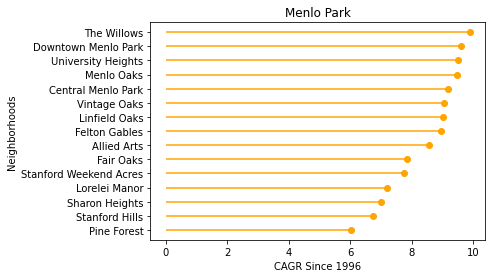

In [38]:
# Lollipop Graph to show rank of Menlo Park Neighborhoods
df_mp = df_mp.sort_values(by='CAGR96')
my_range=range(1,len(df_mp.index)+1)
 


plt.hlines(y=my_range, xmin=0, xmax=df_mp['CAGR96'], color='orange')
plt.plot(df_mp['CAGR96'], my_range, "o", color='orange')
 
# Add titles and axis names
plt.yticks(my_range, df_mp['RegionName'])
plt.title("Menlo Park", loc='center')
plt.xlabel('CAGR Since 1996')
plt.ylabel('Neighborhoods')


#plt.savefig('lollipop2.png', transparent=True,dpi=300, bbox_inches='tight')
plt.show();
